In [1]:
from cov.covSum import covSum
from cov.covSEard import covSEard
from cov.covNoise import covNoise
from lik.loglikelihood import loglikelihood
import numpy as np
from scipy.optimize import minimize
from local_linearfit import local_linearfit
from calculate_gx import calculate_gx
from maximize_PD import maximize_PD
from JumpGP_LD import JumpGP_LD
from simulate_case import simulate_case

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from skimage import measure

import numpy as np
from scipy.optimize import minimize
from scipy.linalg import cholesky
from scipy.stats import norm

from lik.loglikelihood import loglikelihood
from calculate_gx import calculate_gx
from cov.covSum import covSum
from cov.covSEard import covSEard
from cov.covNoise import covNoise
from lik.loglikelihood import loglikelihood

from JumpGP_QD import JumpGP_QD

In [70]:
from itertools import combinations

def compute_distance(set_a, set_b):
    """计算两个集合之间的距离"""
    intersection_size = len(set_a & set_b)
    min_size = min(len(set_a), len(set_b))
    # return intersection_size / min_size if min_size > 0 else 0
    return intersection_size

def merge_groups(groups, tau):
    """合并组直到组间距离都大于阈值 tau"""
    while True:
        # 计算所有组间的距离
        distances = []
        for (i, group_a), (j, group_b) in combinations(enumerate(groups), 2):
            distance = compute_distance(group_a, group_b)
            distances.append((distance, i, j))

        # 按距离从大到小排序
        distances.sort(reverse=True, key=lambda x: x[0])
        # print(distances)

        # 如果最大距离小于等于 tau，停止合并
        if distances[0][0] <= tau:
            break

        # 否则，合并距离最大的两个组
        _, i, j = distances[0]
        groups[i] = groups[i] | groups[j]  # 合并集合
        del groups[j]  # 删除已合并的组
        if len(groups)<5:
            break

    return groups

# # 示例用法
# groups = [
#     {1, 2, 3},
#     {2, 3, 4},
#     {5, 6},
#     {1, 7, 8}
# ]
# tau = 0.5
# merged_groups = merge_groups(groups, tau)
# print("合并后的组:", merged_groups)


In [3]:
caseno, sig, percent_train = 6, 2, 0.5
x, y, xt, yt, y0, gx, r, bw = simulate_case(caseno, sig, percent_train)
L = len(gx)

# 数据中心化
my = np.mean(yt)
y, yt, y0 = y - my, yt - my, y0 - my

# 获取边界
bw = bw.reshape(L, L)

In [4]:
num_points = 50
points = np.random.uniform(-0.5, 0.5, (num_points, 2))
points.shape

(50, 2)

In [29]:
def genPts(n=50):
    num_points_per_side = int(np.sqrt(n))  # 根据需要生成的点数取整
    x = np.linspace(-0.5, 0.5, num_points_per_side)
    y = np.linspace(-0.5, 0.5, num_points_per_side)
    
    # 生成均匀分布的网格点
    xv, yv = np.meshgrid(x, y)
    points = np.column_stack([xv.ravel(), yv.ravel()])
    return points

In [90]:
num_points = 50
xs = genPts(num_points)
rand = 0
xs.shape

(49, 2)

In [21]:
xs = points
rand = 1

In [91]:
groups = []
# xs = points
for j in range(xs.shape[0]):
    xt = xs[j, :]

    # 找到k个最近邻
    nbrs = NearestNeighbors(n_neighbors=50, algorithm='auto').fit(x)
    idx = nbrs.kneighbors([xt], return_distance=False)[0]
    lx, ly = x[idx, :], y[idx]
    ly = ly.reshape(-1, 1)
    xt = xt.reshape(1, -1)

    # 选择JumpGP函数
    mu_t, sig2_t, model, h3 = JumpGP_QD(lx, ly, xt, 'CEM', True)
    r_flat = model['r'].flatten()
    true_idx_set = set(idx[r_flat])
    groups.append(true_idx_set)

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: overflow encountered in exp
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: inval

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
we fail at iteration 0
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization
Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\covSEard.py:24: RuntimeWarning: overflow encountered in exp
  sf2 = np.exp(2 * loghyper[D])  # Signal variance
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\covSEard.py:28: RuntimeWarning: divide by zero encountered in divide
  K = sf2 * np.exp(-sq_dist(np.diag(1./ell) @ x.T) / 2)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\sq_dist.py:39: RuntimeWarning: invalid value encountered in subtract
  C += (np.tile(b[d, :], (n, 1)) - np.tile(a[d, :].reshape(-1, 1), (1, m)

we fail at iteration 1
Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )


Plotting results for mode: CEM
Initial boundary visualization
we fail at iteration 0
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\covSEard.py:23: RuntimeWarning: overflow encountered in exp
  ell = np.exp(loghyper[:D])  # Characteristic length scales
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\covSEard.py:24: RuntimeWarning: overflow encountered in exp
  sf2 = np.exp(2 * loghyper[D])  # Signal variance
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\covSEard.py:28: RuntimeWarning: divide by zero encountered in divide
  K = sf2 * np.exp(-sq_dist(np.diag(1./ell) @ x.T) / 2)
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\cov\sq_dist.py:39: RuntimeWarning: invalid value encountered in subtract
  C += (np.tile(b[d, :], (n, 1)) - np.tile(a[d, :].reshape(-1, 1), (1, m))) ** 2
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py

Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization
Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM
Initial boundary visualization


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

Plotting results for mode: CEM


C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\JumpGP_code_py\maximize_PD.py:80: RuntimeWarn

<Figure size 640x480 with 0 Axes>

In [62]:
len(origin)

100

In [92]:
origin = groups.copy()

In [101]:
groups1 = origin.copy()
print(len(groups1))
tau = 7
merged_groups = merge_groups(groups1, tau)

49


In [102]:
len(origin)

49

In [103]:
len(merged_groups)

9

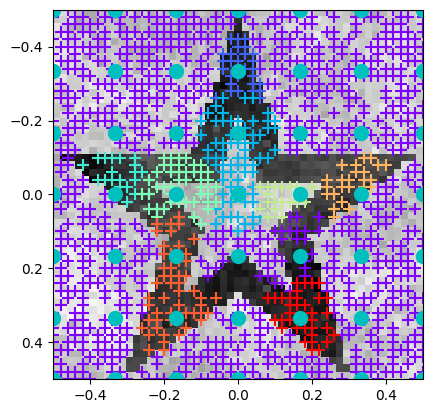

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 yt, L, gx, merged_groups, x, lx 已定义
plt.imshow(np.reshape(yt, (L, L)), cmap='gray', extent=(gx[0], gx[-1], gx[-1], gx[0]))

# 使用不同的颜色给每个组
colors = plt.cm.rainbow(np.linspace(0, 1, len(merged_groups)))  # 选择一个颜色映射，如 'rainbow'

for i, group in enumerate(merged_groups):
    idx = list(group)
    plt.scatter(x[idx, 0], x[idx, 1], color=colors[i], marker='+', s=70, label=f'Group {i+1}')
plt.scatter(xs[:, 0], xs[:, 1], color='c', marker='o', s=100, label=f'Group {i+1}')

# plt.legend()
num_points = 50
plt.savefig(f'./results/hier/hier{caseno}_tau{tau}_rand{rand}_num{num_points}.jpg', dpi=300, bbox_inches='tight')
plt.show()



In [53]:
len(groups)

8

In [77]:
xs.shape

(50, 2)